# World University Rankings

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

### University Ranking Data

The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing university_names.

The Academic Ranking of World Universities, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The Center for World University Rankings, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

* How do these rankings compare to each other?
* Are the various criticisms levied against these rankings fair or not?
* How does your alma mater fare against the world?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the Rankings
all_times_rankings = pd.read_csv('timesData.csv')
all_saudi_rankings = pd.read_csv('cwurData.csv')
all_shanghai_rankings = pd.read_csv('shanghaiData.csv')

# rename 'institution' column in Cwur ranking to 'university_name' to be like the other
all_saudi_rankings = all_saudi_rankings.rename(columns={'institution':'university_name'})

## Part 1 - Ranking Comparison

In the first part of this project, we will focus on how the ranking centres fare when compared to each other. Do they rank any common universities as the best? What factors do they take into account when ranking a university? Which factors carry the most weight?

For the purpose of this project, we will consider the top 100 universities ranked by each center. For statistical plotting, we will consider the data between 2013 and 2015.

Let's start by selecting the datasets by year for each ranking. 

In [2]:
# Times data for 2013
times_2013 = all_times_rankings[all_times_rankings['year'] == 2013]
times_2014 = all_times_rankings[all_times_rankings['year'] == 2014]
times_2015 = all_times_rankings[all_times_rankings['year'] == 2015]

# Shanghai data for 2013
shanghai_2013 = all_shanghai_rankings[all_shanghai_rankings['year'] == 2013]
shanghai_2014 = all_shanghai_rankings[all_shanghai_rankings['year'] == 2014]
shanghai_2015 = all_shanghai_rankings[all_shanghai_rankings['year'] == 2015]

# Saudi data for 2013
saudi_2013 = all_saudi_rankings[all_saudi_rankings['year'] == 2013]
saudi_2014 = all_saudi_rankings[all_saudi_rankings['year'] == 2014]
saudi_2015 = all_saudi_rankings[all_saudi_rankings['year'] == 2015]

### 1.1: Top 10 universities from each ranking

Next up, let's look at what each ranking considers as the top 10 universities. A dataframe will be created for each and then we'll use the `merge` function to check which universities are common between the 3 rankings. We will for now consider the overall score.

#### Top 10 universities for THE for period 2013-2015

In [3]:
# Check top 10 uni's for Times ranking in period 2013-2015
top10_times2013 = times_2013[['university_name', 'total_score']].head(10)
top10_times2014 = times_2014[['university_name', 'total_score']].head(10)
top10_times2015 = times_2015[['university_name', 'total_score']].head(10)

# Merge the THE top 10 for 2013 and 2014
merged_Times = pd.merge(left=top10_times2013, right=top10_times2014, how='inner', on='university_name', suffixes=('_Times_2013', '_Times_2014'))

# Merge the top 10 of Times and Shanghai with the Saudi and check for common uni's
top_times = pd.merge(left=merged_Times, right=top10_times2015[['university_name', 'total_score']], how='inner', on='university_name')

# Rename final column
top_times = top_times.rename(columns={'total_score':'total_score_Times_2015'})
top_times

,university_name,total_score_Times_2013,total_score_Times_2014,total_score_Times_2015
0,California Institute of Technology,95.5,94.9,94.3
1,Stanford University,93.7,93.8,92.9
2,University of Oxford,93.7,93.9,93.2
3,Harvard University,93.6,93.9,93.3
4,Massachusetts Institute of Technology,93.1,93.0,91.9
5,Princeton University,92.7,92.7,90.9
6,University of Cambridge,92.6,92.3,92.0
7,Imperial College London,90.6,87.5,87.5
8,"University of California, Berkeley",90.5,89.8,89.5


From the period above, one can immediately notice that THE are quite consistent in their rankings. This is because for the period 2013-2015, 9 out of their top 10 universities were consistent.

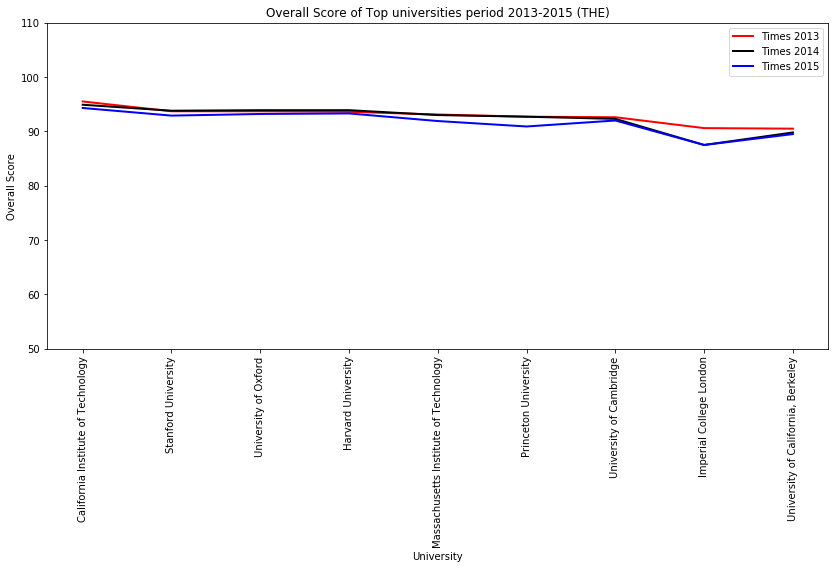

In [4]:
top_times.total_score_Times_2013=pd.to_numeric(top_times.total_score_Times_2013)
top_times.total_score_Times_2014=pd.to_numeric(top_times.total_score_Times_2014)
top_times.total_score_Times_2015=pd.to_numeric(top_times.total_score_Times_2015)
top_times.dtypes

fig = plt.figure(figsize=(14,6))
plt.plot(top_times['university_name'], top_times['total_score_Times_2013'], c='red', linewidth=2.0, label='Times 2013')
plt.plot(top_times['university_name'], top_times['total_score_Times_2014'], c='black', linewidth=2.0, label='Times 2014')
plt.plot(top_times['university_name'], top_times['total_score_Times_2015'], c='blue', linewidth=2.0, label='Times 2015')
plt.xticks(rotation='vertical')
plt.xlabel('University')
plt.ylabel('Overall Score')
plt.title('Overall Score of Top universities period 2013-2015 (THE)')
plt.ylim(50,110)
plt.legend()

#### Top 10 universities for Shanghai period 2013-2015

Let's now do the same for the Top 10 universities for the Shanghai ranking. We will follow the same procedure, i.e.:
* Select top 10 uni's from each year
* Merge datasets to get the common universities
* Convert datatype object to numeric, ready for plotting
* Plot all columns on the same plot.

In [5]:
# Check top 10 uni's for Shanghai ranking in period 2013-2015
top10_shanghai2013 = shanghai_2013[['university_name', 'total_score']].head(10)
top10_shanghai2014 = shanghai_2014[['university_name', 'total_score']].head(10)
top10_shanghai2015 = shanghai_2015[['university_name', 'total_score']].head(10)

# Merge the Shanghai top 10 for 2013 and 2014
merged_shanghai = pd.merge(left=top10_shanghai2013, right=top10_shanghai2014, how='inner', on='university_name', suffixes=('_Shanghai_2013', '_Shanghai_2014'))

# Merge the top 10 of 2013,2014 with 2015 and check for common uni's
top_shanghai = pd.merge(left=merged_shanghai, right=top10_shanghai2015[['university_name', 'total_score']], how='inner', on='university_name')

# Rename final column
top_shanghai = top_shanghai.rename(columns={'total_score':'total_score_Shanghai_2015'})
top_shanghai

,university_name,total_score_Shanghai_2013,total_score_Shanghai_2014,total_score_Shanghai_2015
0,Harvard University,100.0,100.0,100.0
1,Stanford University,72.6,72.1,73.3
2,Massachusetts Institute of Technology (MIT),71.1,70.5,70.4
3,University of Cambridge,69.6,69.2,68.8
4,California Institute of Technology,62.9,60.5,59.6
5,Princeton University,61.9,60.7,61.0
6,Columbia University,59.8,59.6,58.8
7,University of Chicago,57.1,57.4,57.1
8,University of Oxford,55.9,57.4,56.6


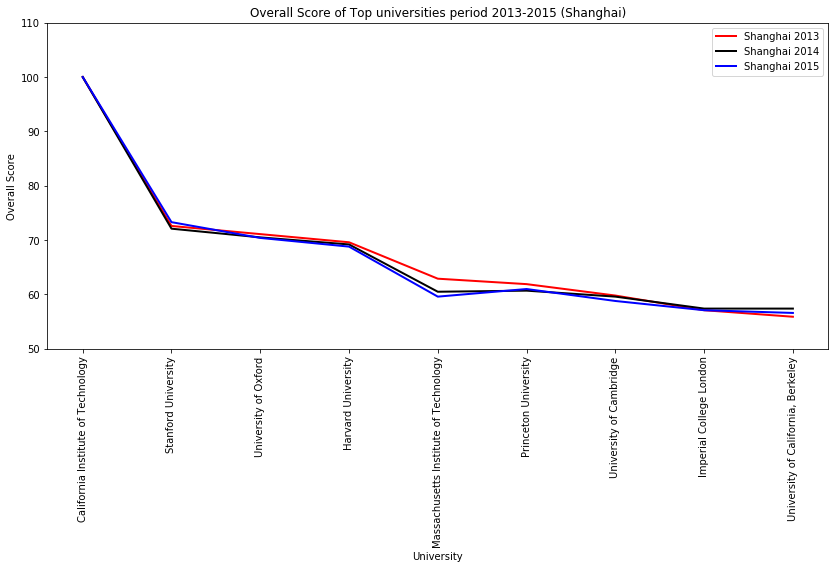

In [6]:
top_shanghai.total_score_Shanghai_2013=pd.to_numeric(top_shanghai.total_score_Shanghai_2013)
top_shanghai.total_score_Shanghai_2014=pd.to_numeric(top_shanghai.total_score_Shanghai_2014)
top_shanghai.total_score_Shanghai_2015=pd.to_numeric(top_shanghai.total_score_Shanghai_2015)

fig = plt.figure(figsize=(14,6))
plt.plot(top_times['university_name'], top_shanghai['total_score_Shanghai_2013'], c='red', linewidth=2.0, label='Shanghai 2013')
plt.plot(top_times['university_name'], top_shanghai['total_score_Shanghai_2014'], c='black', linewidth=2.0, label='Shanghai 2014')
plt.plot(top_times['university_name'], top_shanghai['total_score_Shanghai_2015'], c='blue', linewidth=2.0, label='Shanghai 2015')
plt.xticks(rotation='vertical')
plt.title('Overall Score of Top universities period 2013-2015 (Shanghai)')
plt.xlabel('University')
plt.ylabel('Overall Score')
plt.ylim(50,110)
plt.legend()

#### Saudi top 10 universities for period 2013-2015

In [7]:
# Check top 10 uni's for saudi ranking in period 2013-2015
top10_saudi2013 = saudi_2013[['university_name', 'score']].head(10)
top10_saudi2014 = saudi_2014[['university_name', 'score']].head(10)
top10_saudi2015 = saudi_2015[['university_name', 'score']].head(10)

# Merge the saudi top 10 for 2013 and 2014
merged_saudi = pd.merge(left=top10_saudi2013, right=top10_saudi2014, how='inner', on='university_name', suffixes=('_saudi_2013', '_saudi_2014'))

# Merge the top 10 of 2013,2014 with 2015 and check for common uni's
top_saudi = pd.merge(left=merged_saudi, right=top10_saudi2015[['university_name', 'score']], how='inner', on='university_name')

# Rename final column
top_saudi = top_saudi.rename(columns={'score':'total_score_saudi_2015'})
top_saudi

,university_name,score_saudi_2013,score_saudi_2014,total_score_saudi_2015
0,Harvard University,100.00,100.00,100.00
1,Stanford University,93.94,99.09,98.66
2,University of Oxford,92.54,97.51,96.46
3,Massachusetts Institute of Technology,91.45,98.69,97.54
4,University of Cambridge,90.24,97.64,96.81
5,Columbia University,88.21,97.41,96.14
6,"University of California, Berkeley",85.07,92.84,92.25
7,Princeton University,82.17,88.56,89.42
8,University of Chicago,79.16,92.03,90.70


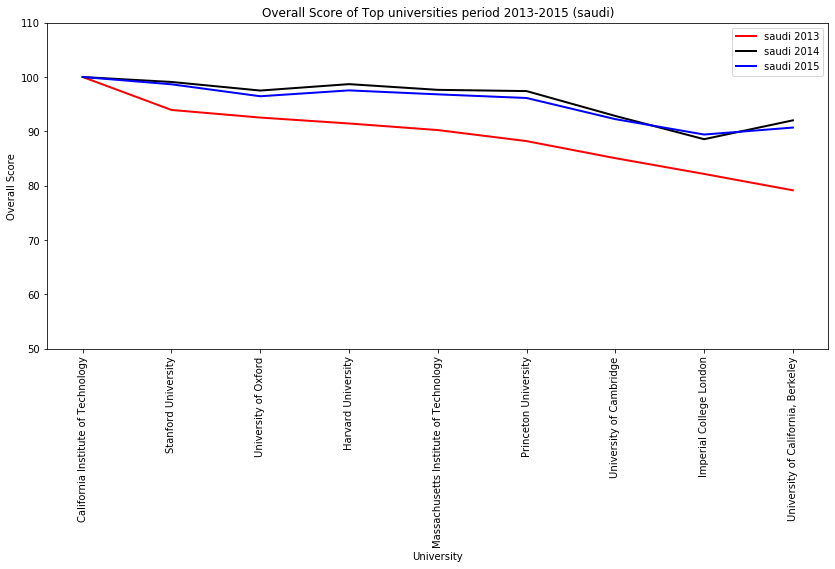

In [8]:
top_saudi.score_saudi_2013=pd.to_numeric(top_saudi.score_saudi_2013)
top_saudi.score_saudi_2014=pd.to_numeric(top_saudi.score_saudi_2014)
top_saudi.total_score_saudi_2015=pd.to_numeric(top_saudi.total_score_saudi_2015)

fig = plt.figure(figsize=(14,6))
plt.plot(top_times['university_name'], top_saudi['score_saudi_2013'], c='red', linewidth=2.0, label='saudi 2013')
plt.plot(top_times['university_name'], top_saudi['score_saudi_2014'], c='black', linewidth=2.0, label='saudi 2014')
plt.plot(top_times['university_name'], top_saudi['total_score_saudi_2015'], c='blue', linewidth=2.0, label='saudi 2015')
plt.xticks(rotation='vertical')
plt.title('Overall Score of Top universities period 2013-2015 (saudi)')
plt.xlabel('University')
plt.ylabel('Overall Score')
plt.ylim(50,110)
plt.legend()

C:\Users\imer\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


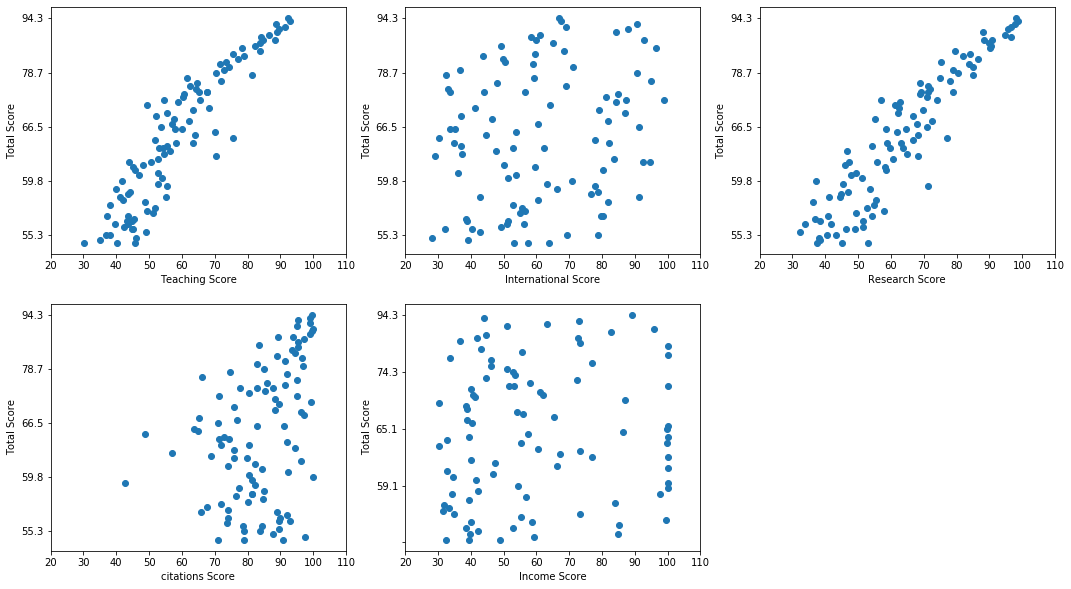

In [9]:
#THE Factors - Based on 2015

# Set list of columns to be used as factors
factors_cols = ['university_name', 'country', 'teaching', 'international', 'research', 'citations', 'income', 'total_score']
top100_times2015 = times_2015[factors_cols].head(100)

# Set the figure size and to include 2 rows and 3 columns
times_factors_fig = plt.figure(figsize=(18,10))

# Inititate each figure according to factor name (5 in all)
teaching = times_factors_fig.add_subplot(2,3,1)
international = times_factors_fig.add_subplot(2,3,2)
research = times_factors_fig.add_subplot(2,3,3)
citations = times_factors_fig.add_subplot(2,3,4)
income = times_factors_fig.add_subplot(2,3,5)

# Scatter plot for teaching factor
teaching.scatter(top100_times2015['teaching'], top100_times2015['total_score'])
teaching.set_xlabel('Teaching Score')
teaching.set_ylabel('Total Score')
teaching.invert_yaxis()                              # y axis made in ascending order
teaching.set_xlim(20,110)
teaching.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for international factor

# Converted international dtype to float (it was object)
top100_times2015['international'] = top100_times2015['international'].astype(float)
international.scatter(top100_times2015['international'], top100_times2015['total_score'])
international.set_xlabel('International Score')
international.set_ylabel('Total Score')
international.invert_yaxis()
international.set_xlim(20,110)
international.yaxis.set_major_locator(plt.MaxNLocator(5))

# Scatter plot for research factor
research.scatter(top100_times2015['research'], top100_times2015['total_score'])
research.set_xlabel('Research Score')
research.set_ylabel('Total Score')
research.invert_yaxis()
research.set_xlim(20,110)
research.yaxis.set_major_locator(plt.MaxNLocator(5))

# Scatter plot for citations factor
citations.scatter(top100_times2015['citations'], top100_times2015['total_score'])
citations.set_xlabel('citations Score')
citations.set_ylabel('Total Score')
citations.invert_yaxis()
citations.set_xlim(20,110)
citations.yaxis.set_major_locator(plt.MaxNLocator(5))

# Scatter plot for Income factor
# Removed rows which contain '-' as the income value and created new df specifically for this
top100_times2015_income = top100_times2015[top100_times2015.income != '-']

# Converted income dtype to float (it was object)
top100_times2015_income['income'] = top100_times2015_income['income'].astype(float)
income.scatter(top100_times2015_income['income'], top100_times2015_income['total_score'])
income.set_xlabel('Income Score')
income.set_ylabel('Total Score')
income.invert_yaxis()
income.set_xlim(20,110)
income.yaxis.set_major_locator(plt.MaxNLocator(5))

In [10]:
# Check for English-Language bias
top100_times2015['country'].value_counts()

United States of America    45
United Kingdom              11
Netherlands                  6
Germany                      6
Australia                    5
Canada                       4
South Korea                  3
Sweden                       3
Switzerland                  3
Singapore                    2
Belgium                      2
Japan                        2
Hong Kong                    2
France                       2
China                        2
Turkey                       1
Italy                        1
Name: country, dtype: int64

**65% of the top 100 universities ranked in the 2015 THE ranking have English as their main language (usa = 45, uk = 11, australia = 5, canada = 4). 

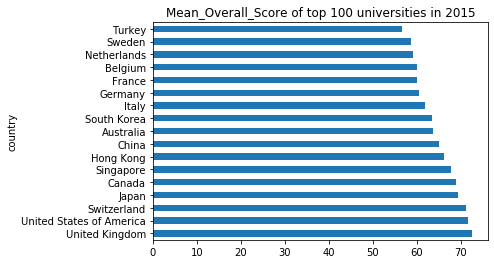

In [11]:
top100_times2015['total_score'] = top100_times2015['total_score'].astype(float)
grouped = top100_times2015.groupby('country')
score_grouped = grouped['total_score']

mean_total = score_grouped.mean().sort_values(ascending=False)
mean_total.plot(kind='barh', title='Mean_Overall_Score of top 100 universities in 2015')

In [12]:
# Shanghai 2015 Data Factors

# Columns of shanghai factors
shanghai_factors = ['university_name', 'total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp']
top100_shanghai2015 = shanghai_2015[shanghai_factors].head(100)

top100_shanghai2015.dtypes

university_name     object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
dtype: object

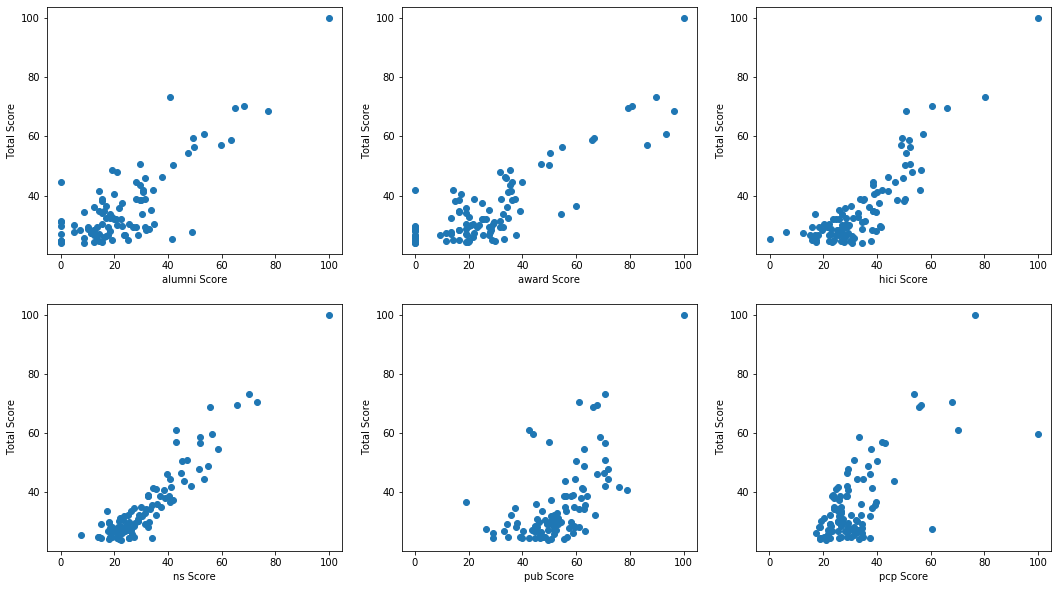

In [13]:
# Plotting of scatter plots

shanghai_factors_fig = plt.figure(figsize=(18,10))

alumni = shanghai_factors_fig.add_subplot(2,3,1)
award = shanghai_factors_fig.add_subplot(2,3,2)
hici = shanghai_factors_fig.add_subplot(2,3,3)
ns = shanghai_factors_fig.add_subplot(2,3,4)
pub = shanghai_factors_fig.add_subplot(2,3,5)
pcp = shanghai_factors_fig.add_subplot(2,3,6)

# Scatter plot for alumni factor
alumni.scatter(top100_shanghai2015['alumni'], top100_shanghai2015['total_score'])
alumni.set_xlabel('alumni Score')
alumni.set_ylabel('Total Score')
alumni.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for award factor
award.scatter(top100_shanghai2015['award'], top100_shanghai2015['total_score'])
award.set_xlabel('award Score')
award.set_ylabel('Total Score')
award.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for hici factor
hici.scatter(top100_shanghai2015['hici'], top100_shanghai2015['total_score'])
hici.set_xlabel('hici Score')
hici.set_ylabel('Total Score')
hici.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for ns factor
ns.scatter(top100_shanghai2015['ns'], top100_shanghai2015['total_score'])
ns.set_xlabel('ns Score')
ns.set_ylabel('Total Score')
ns.set_xlim(-5,105)
ns.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for pub factor
pub.scatter(top100_shanghai2015['pub'], top100_shanghai2015['total_score'])
pub.set_xlabel('pub Score')
pub.set_ylabel('Total Score')
pub.set_xlim(-5,105)
pub.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for pcp factor
pcp.scatter(top100_shanghai2015['pcp'], top100_shanghai2015['total_score'])
pcp.set_xlabel('pcp Score')
pcp.set_ylabel('Total Score')
pcp.set_xlim(-5,105)
pcp.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

In [14]:
saudi_factors = ['university_name', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents', 'score']
top100_saudi2015 = saudi_2015[saudi_factors].head(100)
top100_saudi2015

,university_name,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
1200,Harvard University,1,1,1,1,1,1,3,100.00
1201,Stanford University,9,2,4,5,3,3,10,98.66
1202,Massachusetts Institute of Technology,3,11,2,15,2,2,1,97.54
1203,University of Cambridge,2,10,5,11,6,12,48,96.81
1204,University of Oxford,7,13,10,7,12,7,15,96.46
...,...,...,...,...,...,...,...,...,...
1295,University of Zurich,115,389,85,56,46,68,137,51.14
1296,Arizona State University,367,455,66,143,85,76,21,51.13
1297,Yonsei University,367,45,218,140,326,321,23,51.02
1298,University of Oslo,53,286,40,106,134,101,302,50.81


In [15]:
top100_saudi2015.dtypes

university_name          object
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
dtype: object

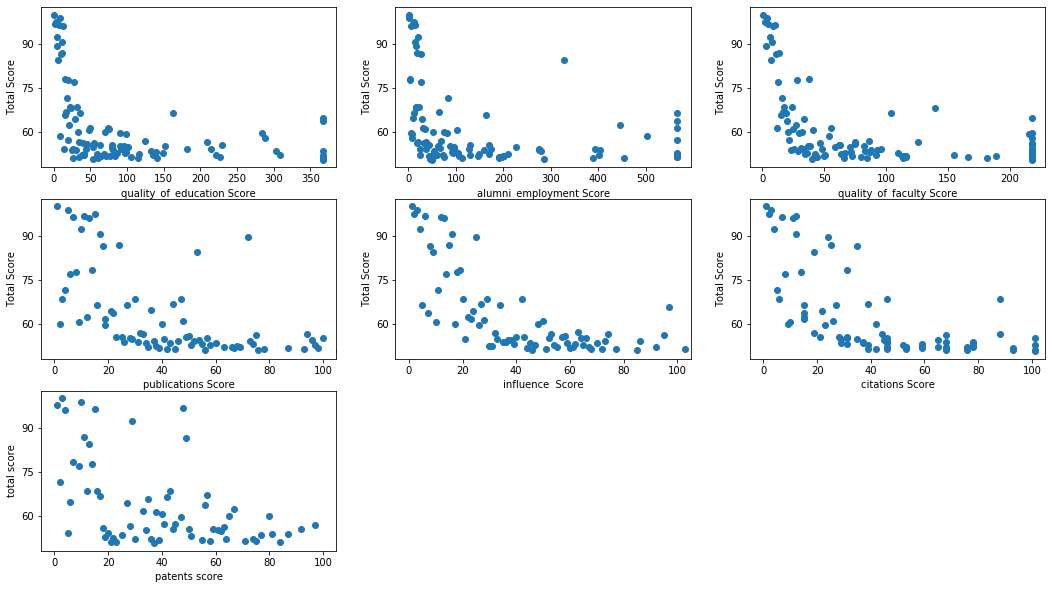

In [16]:
# Plotting of scatter plots

saudi_factors_fig = plt.figure(figsize=(18,10))

quality_of_education = saudi_factors_fig.add_subplot(3,3,1)
alumni_employment  = saudi_factors_fig.add_subplot(3,3,2)
quality_of_faculty = saudi_factors_fig.add_subplot(3,3,3)
publications = saudi_factors_fig.add_subplot(3,3,4)
influence = saudi_factors_fig.add_subplot(3,3,5)
citations = saudi_factors_fig.add_subplot(3,3,6)
patents = saudi_factors_fig.add_subplot(3,3,7)

# Scatter plot for quality_of_education factor
quality_of_education.scatter(top100_saudi2015['quality_of_education'], top100_saudi2015['score'])
quality_of_education.set_xlabel('quality_of_education Score')
quality_of_education.set_ylabel('Total Score')
quality_of_education.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for alumni_employment factor
alumni_employment.scatter(top100_saudi2015['alumni_employment'], top100_saudi2015['score'])
alumni_employment.set_xlabel('alumni_employment Score')
alumni_employment.set_ylabel('Total Score')
alumni_employment.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for quality_of_faculty factor
quality_of_faculty.scatter(top100_saudi2015['quality_of_faculty'], top100_saudi2015['score'])
quality_of_faculty.set_xlabel('quality_of_faculty Score')
quality_of_faculty.set_ylabel('Total Score')
quality_of_faculty.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for publications factor
publications.scatter(top100_saudi2015['publications'], top100_saudi2015['score'])
publications.set_xlabel('publications Score')
publications.set_ylabel('Total Score')
publications.set_xlim(-5,105)
publications.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for influence factor
influence.scatter(top100_saudi2015['influence'], top100_saudi2015['score'])
influence.set_xlabel('influence  Score')
influence.set_ylabel('Total Score')
influence.set_xlim(-5,105)
influence.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for citations factor
citations.scatter(top100_saudi2015['citations'], top100_saudi2015['score'])
citations.set_xlabel('citations Score')
citations.set_ylabel('Total Score')
citations.set_xlim(-5,105)
citations.yaxis.set_major_locator(plt.MaxNLocator(5)) # max nr of ticks in y-axis = 5

# Scatter plot for patents factor
patents.scatter(top100_saudi2015['patents'], top100_saudi2015['score'])
patents.set_xlabel('patents score')
patents.set_ylabel('total score')
patents.set_xlim(-5,105)
patents.yaxis.set_major_locator(plt.MaxNLocator(5))

## Conclusions

From the above data analysis, we can conclude the following:-

#### Consistency between rankings:
After comparing the top 10 universities from each ranking centre, it is immediately noted that the results are consistent with multiple universities making it into the top 10 for the year 2015 for each ranking. So, in their own ways, the ranking centres do manage to come up with an agreeable conclusion about the best universities.

#### Times Higher Education:
From the factors available for the 2015 ranking, it is quite clear from the scatter plots that the THE ranking gives most weight to the following factors: `teaching`, `research` and `citations`. The higher the score in these factors, the higher the overall score for that university.
The results for the `income` and `international` factors scatter plots do not suggest that a lot of weight is given to these factors when determining the best universities.

Furthermore, the line plots for the overall scores of the top10 universities suggest that THE like to give consistent results to universities, preferring not to vary much from one year to the next.

Also, it was seen that THE can be kind of biased towards English-speaking universities, as the UK and USA universities present in the top 100 of year 2015 have the highest average total score.

#### Shanghai Ranking:
This ranking is criticised that it only focuses on the individual research power of the universities almost exclusively. In fact, all the factors taken into account are all research-related. So, the criticism this ranking faces is somewhat accurate. Also, the higher the score for each factor, the higher is the overall score for this ranking.

For the period 2012-2015, a marked decrease in scoring can be seen across the board with the Shanghai Ranking.

#### Saudi Ranking:
The Saudi Ranking uses a mix of factors for its ranking, related to education, research in humanities. From the scatter plots above, it seems as though it gives the most weight to factors such as `quality_of_education` and `alumni_employment`.